# Day 08. Exercise 04
# Regression

## 0. Imports

In [162]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_predict
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [166]:
with open('data/checker_regression.csv', 'r') as fin:
    df = pd.read_csv(fin, sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    59 non-null     float64
 3   AVG(diff)    18 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [168]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    77 non-null     float64
 3   AVG(diff)    77 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [170]:
X = df.drop(['uid', 'AVG(diff)'], axis=1)
y = df['AVG(diff)']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [197]:
def crossval(n_splits, X, y, model):
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    
    scores = cross_validate(model, X, y,
                            scoring='neg_root_mean_squared_error', cv=cv,
                            n_jobs=-1, return_train_score=True)
    
    train_scores = np.negative(scores['train_score'])
    test_scores = np.negative(scores['test_score'])
    
    for train, test in zip(train_scores, test_scores):
        print(f'train -  {train:-20.12f}   |   test -  {test:-20.12f}')
    
    avg_rmse = np.mean(test_scores)
    print(f'\nAverage RMSE on crossval is {avg_rmse}')

In [199]:
lr = LinearRegression(fit_intercept=False)
crossval(6, X, y, lr)

train -       47.402672811102   |   test -       62.714606096486
train -       54.238959907704   |   test -       23.638363086464
train -       48.753721414881   |   test -       56.941351619837
train -       54.138809895781   |   test -       22.730485145810
train -       52.417991758239   |   test -       38.758219599123
train -       42.761933006518   |   test -       80.145007441374

Average RMSE on crossval is 47.488005498182396


In [200]:
dt = DecisionTreeRegressor(max_depth=3, random_state=21)
crossval(6, X, y, dt)

train -       20.568474749022   |   test -       50.801440102390
train -       22.384286836987   |   test -        0.000000000000
train -       20.181270538684   |   test -       47.633047360574
train -       19.279828252531   |   test -       32.911677382067
train -       17.897491739500   |   test -       32.562077661058
train -       16.200524957641   |   test -       57.734048848249

Average RMSE on crossval is 36.94038189238966


In [201]:
rf = RandomForestRegressor(max_depth=3, n_estimators=30,
                                   random_state=21)
crossval(6, X, y, rf)

train -       20.393118562067   |   test -       50.232500605202
train -       24.463029296892   |   test -        0.000000000000
train -       20.632025760055   |   test -       38.082212054836
train -       21.461216468364   |   test -       32.911357171049
train -       20.544671037578   |   test -       29.690845090727
train -       17.859300514114   |   test -       46.084827159152

Average RMSE on crossval is 32.833623680160876


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

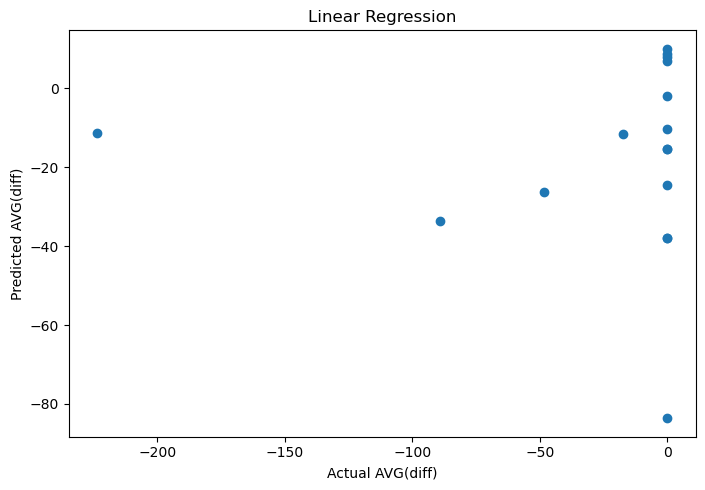

,test_labels,predict
3,0.0,-24.505654
19,-17.5,-11.644061
14,-48.5,-26.325702
45,-223.6,-11.368667
10,0.0,9.979679
54,0.0,8.559950
23,0.0,-15.429133
29,0.0,-1.913592
24,0.0,-15.429133
13,-89.0,-33.634204


In [232]:
# Линейная регрессия
lr_m = lr.fit(X_train, y_train)
lr_preds = cross_val_predict(lr_m, X_test, y_test, cv=6)
gr = pd.DataFrame()
gr["test_labels"] = y_test
gr["predict"] = lr_preds

# Создаем график для каждой модели
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.scatter(y_test, lr_preds)
plt.title("Linear Regression")
plt.xlabel("Actual AVG(diff)")
plt.ylabel("Predicted AVG(diff)")

plt.tight_layout()
plt.show()
gr

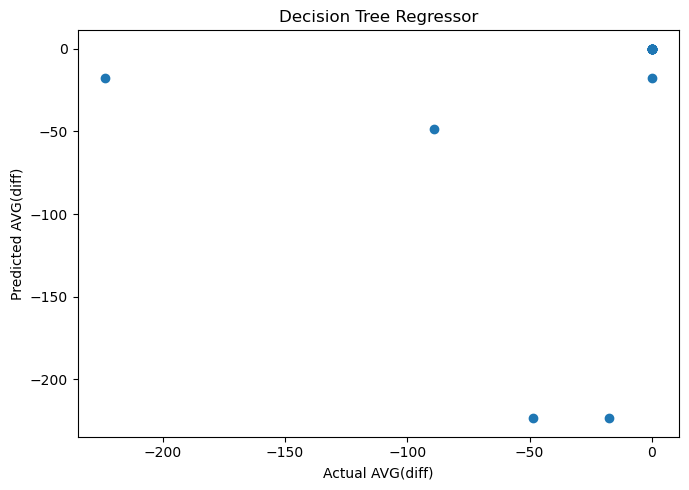

,test_labels,predict
3,0.0,0.0
19,-17.5,-223.6
14,-48.5,-223.6
45,-223.6,-17.5
10,0.0,0.0
54,0.0,0.0
23,0.0,0.0
29,0.0,-17.5
24,0.0,0.0
13,-89.0,-48.5


In [244]:
# Дерево решений
dt_model = dt.fit(X_train, y_train)
dt_preds = cross_val_predict(dt_model, X_test, y_test, cv=6)
gr = pd.DataFrame()
gr["test_labels"] = y_test
gr["predict"] = dt_preds

plt.figure(figsize=(20, 5))
plt.subplot(133)
plt.scatter(y_test, dt_preds)
plt.title("Decision Tree Regressor")
plt.xlabel("Actual AVG(diff)")
plt.ylabel("Predicted AVG(diff)")

plt.tight_layout()
plt.show()
gr

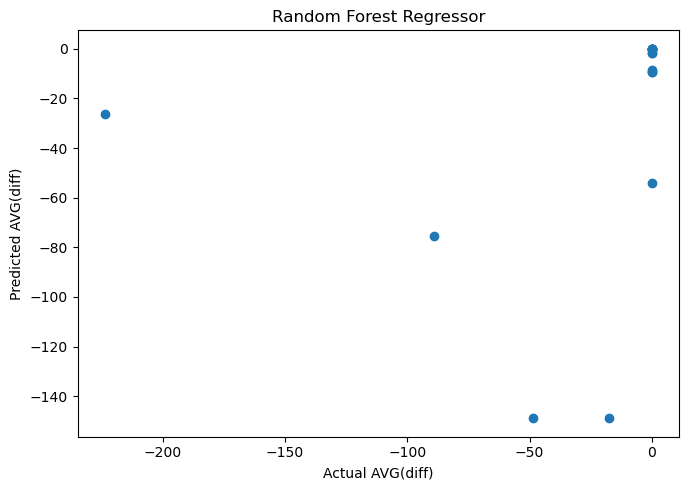

,test_labels,predict
3,0.0,0.000000
19,-17.5,-148.920000
14,-48.5,-148.920000
45,-223.6,-26.083333
10,0.0,0.000000
54,0.0,0.000000
23,0.0,-1.616667
29,0.0,-53.916667
24,0.0,-1.616667
13,-89.0,-75.616667


In [250]:
# Случайный лес
rf_model = rf.fit(X_train, y_train)
rf_preds = cross_val_predict(rf_model, X_test, y_test, cv=6)
gr = pd.DataFrame()
gr["test_labels"] = y_test
gr["predict"] = rf_preds

plt.figure(figsize=(20, 5))
plt.subplot(132)
plt.scatter(y_test, rf_preds)
plt.title("Random Forest Regressor")
plt.xlabel("Actual AVG(diff)")
plt.ylabel("Predicted AVG(diff)")

plt.tight_layout()
plt.show()
gr

- В идеале график для каждой модели должен показывать прямую линию, проходящую через начало координат и под углом 45 градусов - диагональ. Это свидетельствует о том, что предсказанные значения полностью соответствуют фактическим данным, что делает модель максимально точной.